# Notebook on Inferencing on the AL-PUB Dataset
# Using Models from : "An Approach for Noisy, Crowdsourced Datasets Utilizing Ensemble Modeling, Normalized Distributions of Annotations, and Entropic Measures of Uncertainty"
## Submitted to the Journal of Data Mining and Digital Humanities
### By: Matthew I. Swindall

# 

# Load libraries, and saved models

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# Ancient Lives classes
classes = ['Alpha', 'Beta', 'Chi', 'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 
           'Kappa', 'Lambda', 'Mu', 'Nu', 'Omega', 'Omicron', 'Phi', 'Pi', 'Psi' ,
           'Rho', 'Sigma', 'Tau', 'Theta', 'Upsilon', 'Xi', 'Zeta']

# Load ResNet inference model
#infer = load_model("Models/KLD_AL-ALL") # Use KLD model trained on AL-ALL v1
infer = load_model("Models/CXE_AL-ALL") # Use CXE model trained on AL-ALL v1

def Inference(image_path):
    # Load image
    im = cv2.imread(image_path)
    # Reshape Image for Tensorflow as array
    X = []
    res = np.array(im)
    X.append(res)
    x = np.array(X)
    # Run inference using chosen model
    preds = infer.predict(x)
    # Get prediction and confidence values
    imclass = np.argmax(preds[0])
    char = classes[imclass]
    prob = preds[0][imclass]
    # Output prediction and confidence data and display image inferenced
    print("Prediction:", char, " Probability:", prob)
    imname = image_path.split("/")[-1]
    plt.figure()
    plt.title(imname)
    plt.imshow(im[..., ::-1])
    plt.show()
    
#List of sample character images
Samples = ["Sample_Characters/AL-PUB_Alpha_Sample.jpg", 
           "Sample_Characters/AL-PUB_Epsilon_Sample.jpg", 
           "Sample_Characters/AL-PUB_Kappa_Sample.jpg", 
           "Sample_Characters/AL-PUB_Tau_Sample.jpg"]

# Run inferencing on sample character images

1/1 [==============================] - 1s 702ms/step
Prediction: Alpha  Probability: 0.9672327


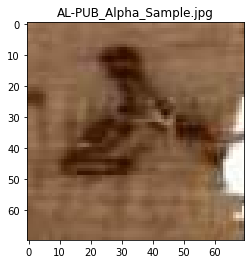

1/1 [==============================] - 0s 52ms/step
Prediction: Epsilon  Probability: 0.9999676


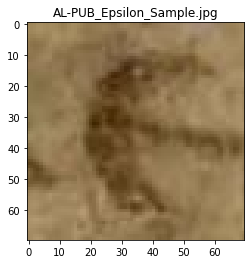

1/1 [==============================] - 0s 53ms/step
Prediction: Kappa  Probability: 0.99999845


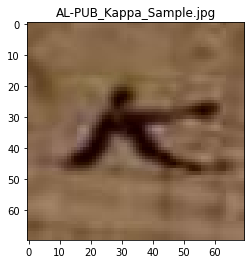

1/1 [==============================] - 0s 54ms/step
Prediction: Tau  Probability: 0.9999938


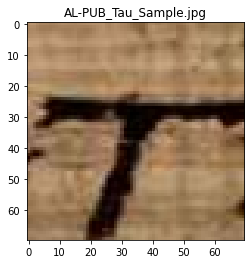

In [8]:
#Run inferencing on sample character images
for i in range(len(Samples)):
    Inference(Samples[i])